df shape: (2580, 81) 

909276070    2
909176150    1
907187080    1
527452190    1
908225370    1
Name: PID, dtype: int64 

df shape: (2397, 81) 

df shape: (2397, 83) 

2009    0.232791
2007    0.230288
2008    0.219858
2006    0.191489
2010    0.125574
Name: YrSold, dtype: float64


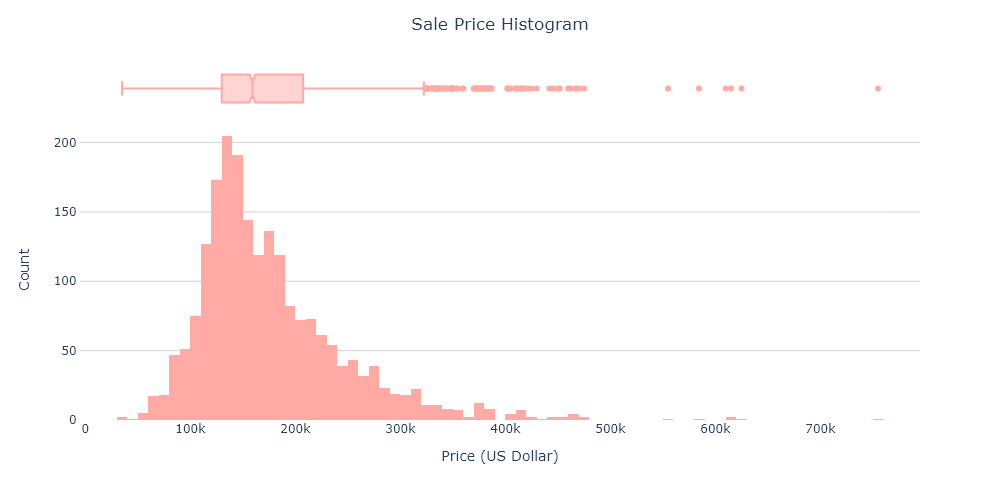

count    1693.000000
mean       68.177200
std        22.676062
min        21.000000
25%        57.000000
50%        67.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


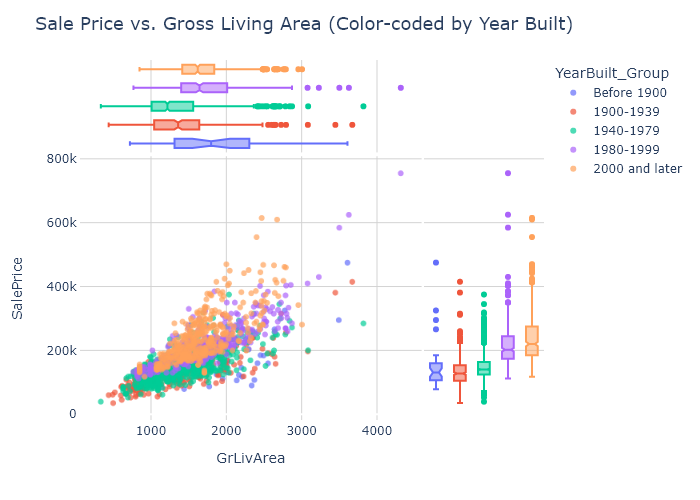

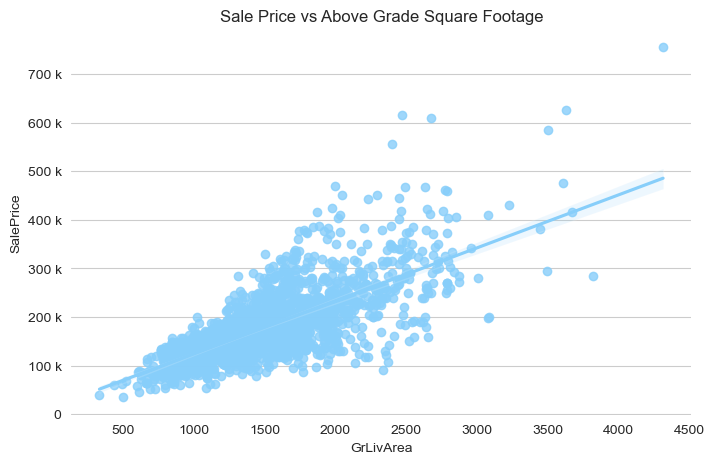

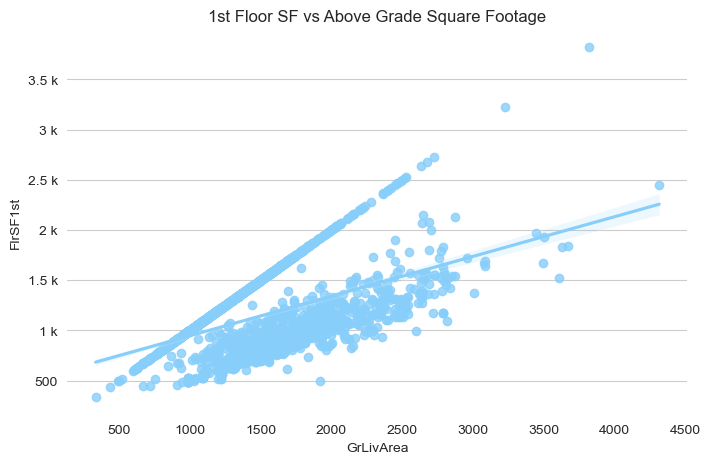

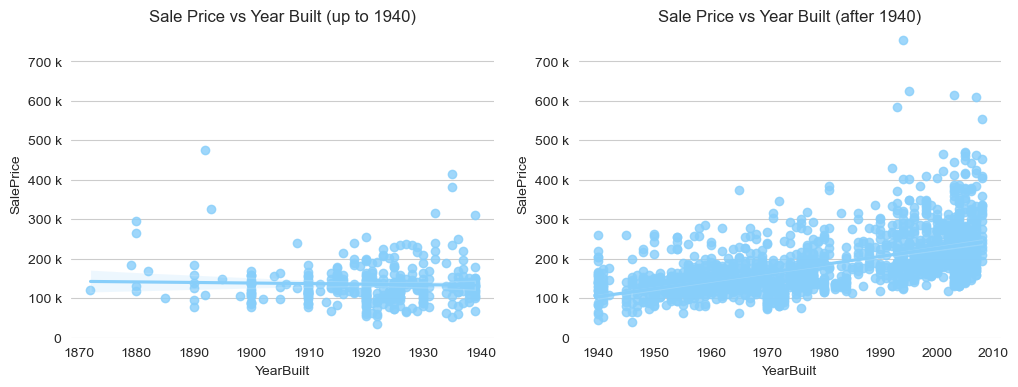

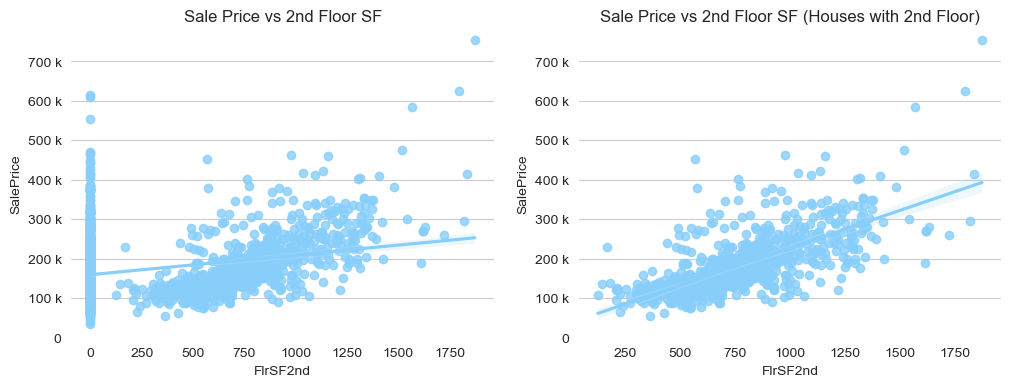

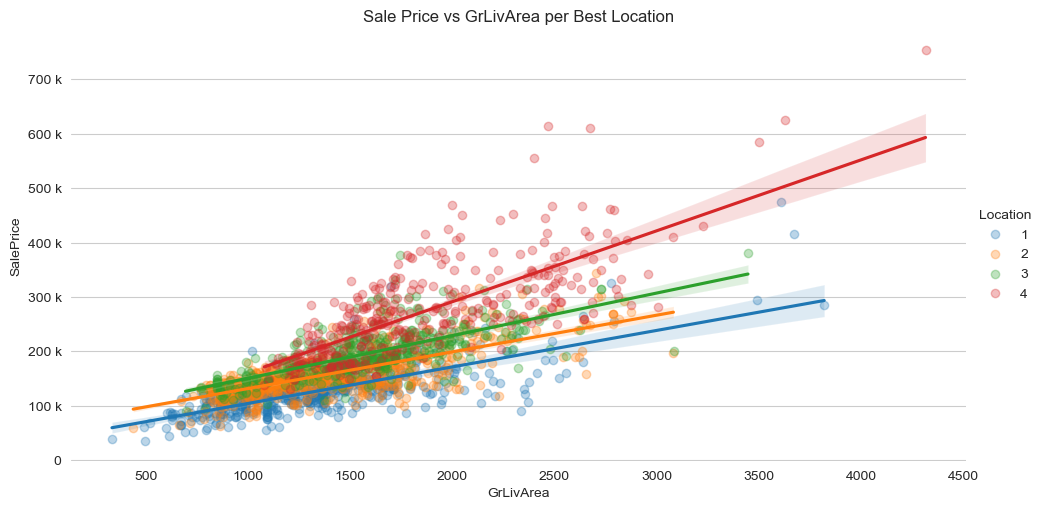

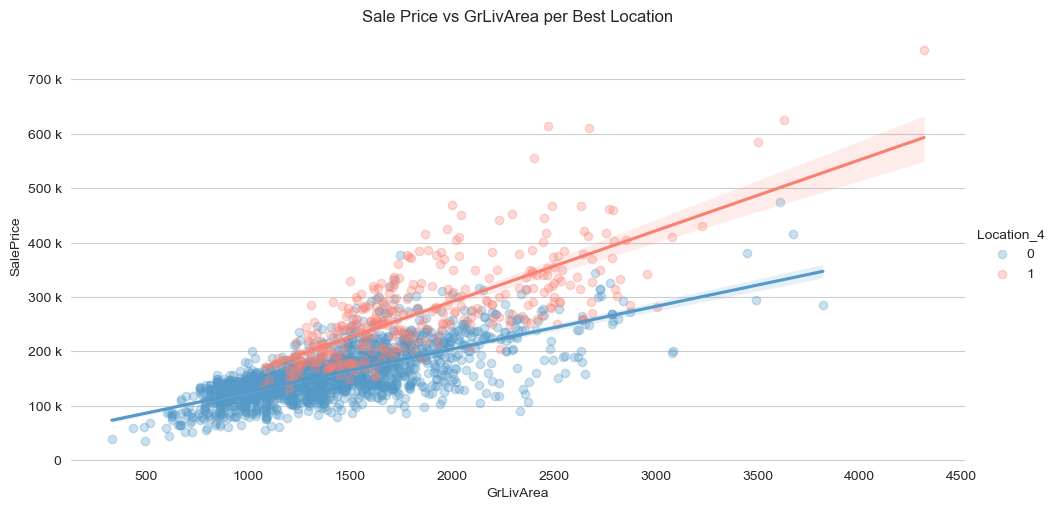

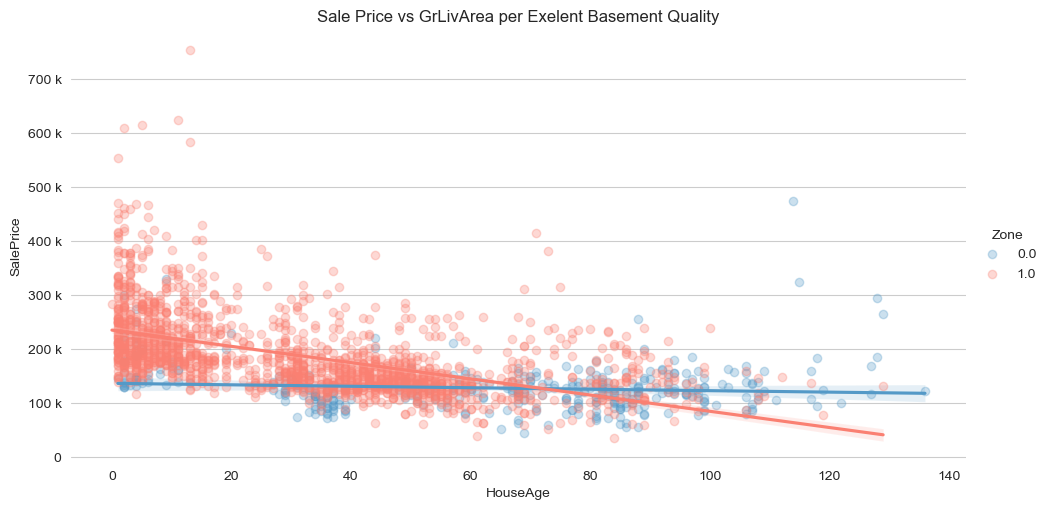

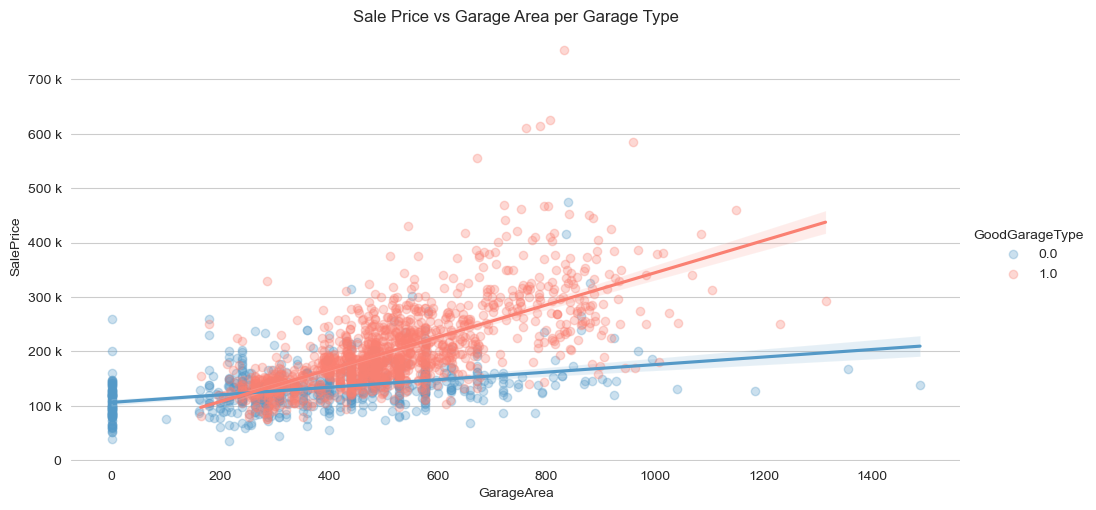

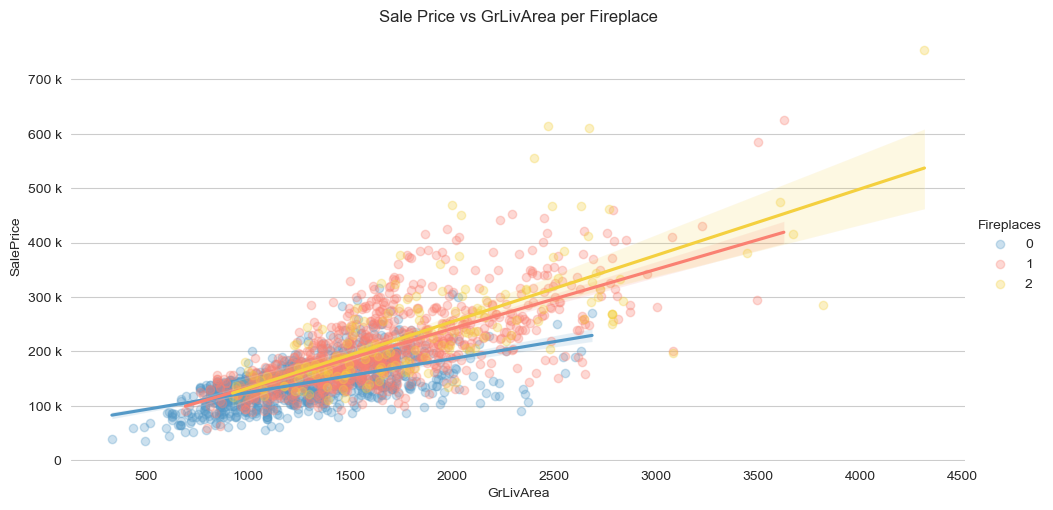

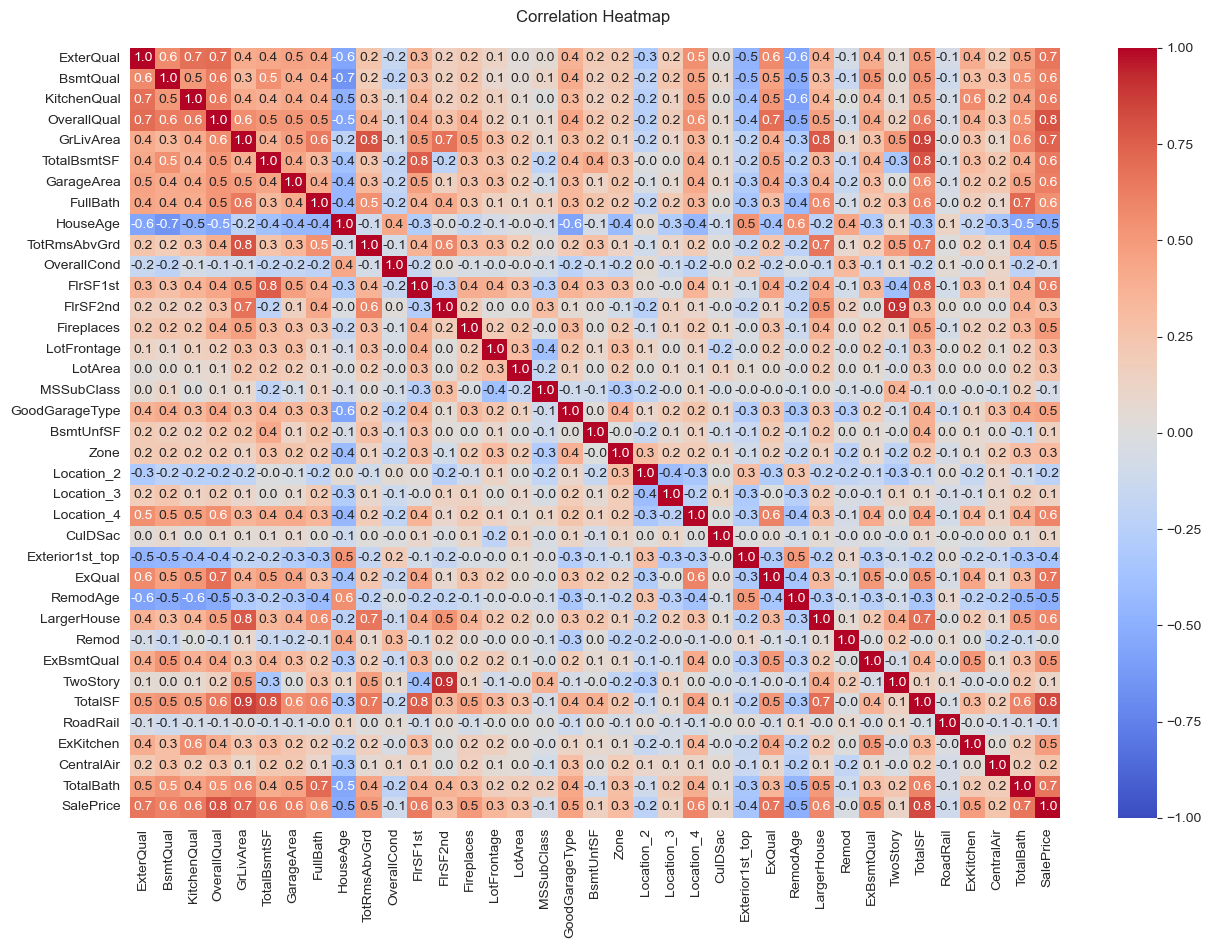

In [1]:
%run 1_Preprocessing.ipynb

In [2]:
print('df shape:', df.shape, '\n')
df.head()


df shape: (2096, 106) 



,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FlrSF1st,FlrSF2nd,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,YearBuilt_Group,HouseAge,RemodAge,TotalSF,TotalBath,RoadRail,GoodGarageType,Zone,CulDSac,Exterior1st_top,TwoStory,ExQual,LargerHouse,Remod,ExBsmtQual,HasFireplace,ExKitchen,ExterQual,BsmtQual,KitchenQual,ExterCond,Location_2,Location_3,Location_4,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,None,None,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,1980-1999,25,25,2098.0,3.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,0,0,0,1,0,0,0,0,0,1
1,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,None,None,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,Before 1900,109,6,1444.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0
2,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,None,None,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,2000 and later,8,8,2475.0,3.5,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1,0,0,0,1,0,0,0,0,0
3,908128060,1922,198500,85,RL,64.0,7301,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,1,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,None,None,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,2000 and later,6,6,1922.0,3.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,2.0,0,0,0,0,0,1,0,0,0,0
4,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,0,SBrkr,936,0,0,0.0,0.0,1,0,2,1,4,Min2,0,None,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,None,None,0,2,2009,WD,Normal,902135020.0,212 10TH ST 210,1940-1979,56,56,1872.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0,0,0,1,0,0,1,0,0,0


In [3]:
import geopy
import time
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [26]:
# def f_address(st):
#     full_address = (str(st) + ", Iowa, United STATES")
#     return full_address

# locator = Nominatim(user_agent="myGeocoder")
# df['full_address'] = df['Prop_Addr'].apply(f_address)
# #location = df['full_address'][0:2].apply(lambda addr: locator.geocode(addr))
# location.latitude
# # y= locator.geocode(df['Prop_Addr'][0:1].apply(f_address))
# # y
# #df['latitutde'],df['longitude'] = locator.geocode(f_address(df['Prop_Addr'][1]))[1]
# # locator.geocode(df['full_address'][0:1])


In [23]:
import pandas as pd
import geopy
import time
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Function to generate full address
def f_address(st):
    full_address = str(st) + ", Iowa, United STATES"
    return full_address

locator = Nominatim(user_agent="myGeocoder")

# Assuming 'df' is your DataFrame containing the data and 'Prop_Addr' is the address column
df['full_address'] = df['Prop_Addr'].apply(f_address)

# Create a new DataFrame to store the latitude and longitude
locations = df['full_address'].apply(lambda addr: locator.geocode(addr, timeout=10)).dropna()

# Extract latitude and longitude into separate columns
df['latitude'] = locations.apply(lambda location: location.latitude)
df['longitude'] = locations.apply(lambda location: location.longitude)

# Display the updated DataFrame
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FlrSF1st,FlrSF2nd,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,YearBuilt_Group,HouseAge,RemodAge,TotalSF,TotalBath,RoadRail,GoodGarageType,Zone,CulDSac,Exterior1st_top,TwoStory,ExQual,LargerHouse,Remod,ExBsmtQual,HasFireplace,ExKitchen,ExterQual,BsmtQual,KitchenQual,ExterCond,Location_2,Location_3,Location_4,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,full_address,latitude,longitude
0,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,None,None,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,1980-1999,25,25,2098.0,3.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,0,0,0,1,0,0,0,0,0,1,"3416 WEST ST, Iowa, United STATES",42.024855,-93.663671
1,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,None,None,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,Before 1900,109,6,1444.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,"1524 DOUGLAS AVE, Iowa, United STATES",41.629402,-93.638426
2,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,None,None,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,2000 and later,8,8,2475.0,3.5,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1,0,0,0,1,0,0,0,0,0,"2304 FILLMORE AVE, Iowa, United STATES",42.044554,-93.631818
3,908128060,1922,198500,85,RL,64.0,7301,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,1,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,None,None,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,2000 and later,6,6,1922.0,3.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,2.0,0,0,0,0,0,1,0,0,0,0,"4003 MARIGOLD DR, Iowa, United STATES",42.018988,-93.671572
4,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,0,SBrkr,936,0,0,0.0,0.0,1,0,2,1,4,Min2,0,None,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,None,None,0,2,2009,WD,Normal,902135020.0,212 10TH ST 210,1940-1979,56,56,1872.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0,0,0,1,0,0,1,0,0,0,"212 10TH ST 210, Iowa, United STATES",41.584122,-93.629370


In [ ]:
#save copy of df and a backup csv
df_locations_copy = df
df.to_csv('data/locations_file.csv', index=False)

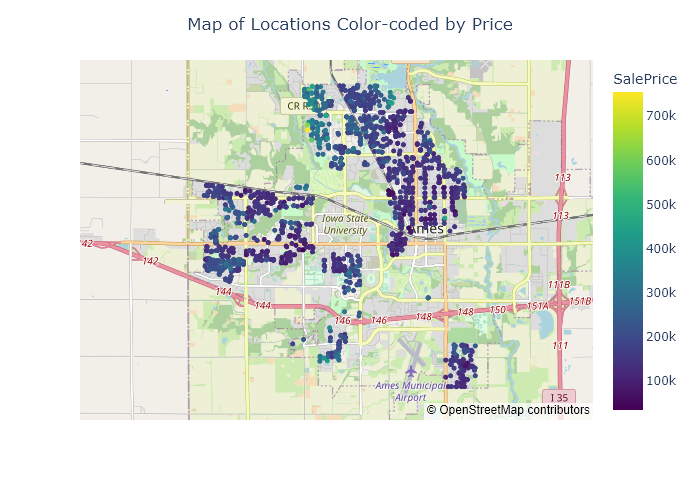

In [53]:
# Create the scatter map plot
fig = px.scatter_mapbox(df, 
                        lat='latitude', 
                        lon='longitude',
                        color='SalePrice',  # Color points by the 'Price' column
                        hover_name='latitude',  #  Set the name to be displayed when hovering over points
                        color_continuous_scale='Viridis',  # Choose a color scale
                        #size_max=15,  #  Set the maximum size of points on the map
                        zoom=11,  #  Set the initial zoom level of the map
                        center=dict(lat=42.0239 , lon=-93.6476)
                        #height=500 #  Set the height of the map figure
                       )  

# Update the map layout
fig.update_layout(
    mapbox_style="open-street-map",  # Choose the map style (e.g., 'open-street-map', 'carto-positron', 'stamen-terrain')
    title='Map of Locations Color-coded by Price',  
    title_x=0.5,  # Adjust the position of the title along the x-axis
)

# Show the map
fig.show()